# Analysis of Video Game Sales Data

This notebook details my attempt at a data challenge to analyze the market of video game sales given the past 30 years of data. 

Video games are a big sector of the entertainment industry. In recent years, the budgets for big titles have increased significantly. For this reason, investors in the video game market would like some guidance on emmerging trends. 

There are three main questions I am attempting to answer in the course of this analysis:

1) What are some major differences between the North American, European, and Japanese video game markets?

2) What video game genres are trending in each market?

3) What features about a video game are most indicative of its success?

In [1]:
#Lets load some useful libraries before beginning any analysis
import pandas as pd
import matplotlib.pyplot as plt

Let's load the dataset (in the form of a CSV) and look at the first few rows of the dataset

In [2]:
SalesData = pd.read_csv('vgsales.csv')

SalesData.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


From a first glance, the data looks clean, with no missing values, or mixed data types. Some of the data is numerical, whereas others are categorical. 

Nintendo seems to be dominating the sales of the top titles. We have several columns in the data frame:

### Features in data set:
Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.


Now, let's take a look at some summary statistics for the numerical columns, such as the published year, and the sales.


In [3]:
SalesData.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


It looks like the counts in the "year" column are fewer than the other columns in the dataframe. This might indicate that some of the data in the year column is missing, and we may have to deal with this later. 

Some other observations: 1) North American sales appear to the highest over the 30 years, with european and japanese sales trailing. 2) The variance in the sales is extremely high, given the high standard deviations of the sales figures. 3) The maximum sales for a title was 83 million globally, and 75% of games reported less than $470k in sales. 

For the categorical variables (Platform, Publisher, Genre), what are the unique values of them, i.e. how many platforms, publishers, and genres are there in the dataset?


In [4]:
print("The number of unique publishers:",SalesData["Publisher"].unique().shape[0])


print("The number of unique platforms:",SalesData["Platform"].unique().shape[0])

print("The number of unique genres:",SalesData["Genre"].unique().shape[0])


The number of unique publishers: 579
The number of unique platforms: 31
The number of unique genres: 12


The dataset contains nearly 17000 titles. The dataset is assumed to be exhaustive, i.e. that the dataset represents the entire population of games. This means that conventional metrics such as averages do not approximate the population through a sampling distribution, as we have access to the entire population. 

### Question 1: What are some major differences between the North American, European, and Japanese video game markets?

First, lets look at some plots comparing the sales in different regions.

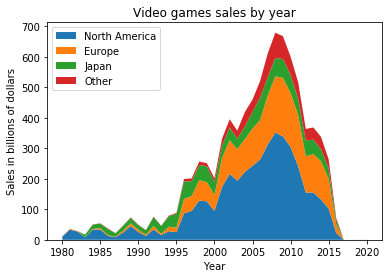

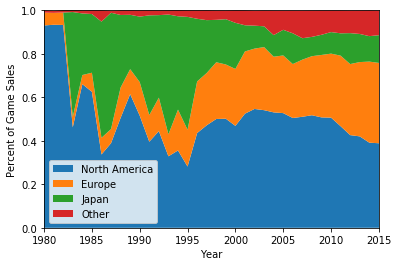

In [22]:
#Get the sum of the sales in each year
YearlySales = SalesData.groupby("Year").sum()

#Import numpy and plotting library and make axes
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax1 = fig.add_subplot(111)

#Plot the data on the axes
YearlySales['Year'] = YearlySales.index
labels=["North America","Europe","Japan","Other"]
ax1.stackplot(YearlySales["Year"],YearlySales["NA_Sales"],YearlySales["EU_Sales"],YearlySales["JP_Sales"],YearlySales["Other_Sales"], labels=labels)
ax1.legend(loc='upper left')
plt.title("Video games sales by year")
plt.ylabel("Sales in billions of dollars")
plt.xlabel("Year")
plt.show()

#Plot the percentage of each region
YearlySales['NA_Percent'] = YearlySales.NA_Sales/YearlySales.Global_Sales
YearlySales['EU_Percent'] = YearlySales.EU_Sales/YearlySales.Global_Sales
YearlySales['JP_Percent'] = YearlySales.JP_Sales/YearlySales.Global_Sales
YearlySales['Other_Percent'] = YearlySales.Other_Sales/YearlySales.Global_Sales

fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.stackplot(YearlySales["Year"],YearlySales["NA_Percent"],YearlySales["EU_Percent"],YearlySales["JP_Percent"],YearlySales["Other_Percent"], labels=labels)
ax2.legend(loc='lower left')
plt.ylim(0,1)
plt.xlim((1980,2015))
plt.xlabel("Year")
plt.ylabel("Percent of Game Sales")
plt.show()





If the data is correct, the greatest sales occured in the year of 2009. The data set gives the appearance of video game sales declining, but in truth we do not have access to the sales information of video game titles; we do not know how titles released in 2009 are selling right now. This is one limitation of the current data set. 

From the bottom plot, we can see that Europe's market expanded after 1995. The market in other regions has been steadily expanding, potentially due to developing economies, such as China. This is one insight that investor's can take away from this analysis, it might be worthwhile to consider investing in titles targeting other regions, or to invest in advertising video games in other countries.

Let's take a look at platforms by region

In [14]:
PlatformSales=SalesData.groupby(["Platform"]).sum()
PlatformSales.sort_values("Global_Sales",ascending=False).iloc[:,2:]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,583.84,339.29,139.20,193.44,1255.64
X360,601.05,280.58,12.43,85.54,979.96
PS3,392.26,343.71,79.99,141.93,957.84
Wii,507.71,268.38,69.35,80.61,926.71
DS,390.71,194.65,175.57,60.53,822.49
PS,336.51,213.60,139.82,40.91,730.66
GBA,187.54,75.25,47.33,7.73,318.50
PSP,108.99,68.25,76.79,42.19,296.28
PS4,96.80,123.70,14.30,43.36,278.10


This data highlights some more interesting trends! In NA, the XBox360 has the highest sales among platforms. In EU, PS3 had the highest sales. In JP the DS (a portable device!) had the highest sales. In Other regions, the PS2 had the highest overall sales. 

In [15]:
PlatformSales=pd.DataFrame(PlatformSales)
print("XBox family sales by Region")
(PlatformSales.loc["XOne"]+PlatformSales.loc["X360"]+PlatformSales.loc["XB"]).drop(["Rank","Year"])

XBox family sales by Region


NA_Sales         870.93
EU_Sales         387.18
JP_Sales          14.15
Other_Sales      106.18
Global_Sales    1379.28
dtype: float64

In [16]:
print("PS family sales by Region")
(PlatformSales.loc["PS"]+PlatformSales.loc["PS2"]+PlatformSales.loc["PS3"]+PlatformSales.loc["PS4"]).drop(["Rank","Year"])

PS family sales by Region


NA_Sales        1409.41
EU_Sales        1020.30
JP_Sales         373.31
Other_Sales      419.64
Global_Sales    3222.24
dtype: float64

In [17]:
print("Nintendo family sales by Region")
(PlatformSales.loc["NES"]+PlatformSales.loc["SNES"]+PlatformSales.loc["Wii"]+PlatformSales.loc["WiiU"]).drop(["Rank","Year"])

Nintendo family sales by Region


NA_Sales         733.20
EU_Sales         332.80
JP_Sales         297.34
Other_Sales       95.59
Global_Sales    1459.69
dtype: float64

### Question 2: What video game genres are trending in each market?

How much sales were made by different game genres in different regions, regardless of the year in which they were published? Let's take a look at that.

In [118]:
GenreSales=SalesData.groupby(["Genre"]).sum()
GenreSales.sort_values("Global_Sales",ascending=False)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,26441383,6531731.0,877.83,525.00,159.95,187.38,1751.18
Sports,17419112,4620621.0,683.35,376.85,135.37,134.97,1330.93
Shooter,9653872,2571588.0,582.60,313.27,38.28,102.69,1037.37
Role-Playing,12032228,2952379.0,327.28,188.06,352.31,59.61,927.37
Platform,6137545,1755347.0,447.05,201.63,130.77,51.59,831.37
Misc,14889052,3432412.0,410.24,215.98,107.76,75.32,809.96
Racing,9943933,2457934.0,359.42,238.39,56.69,77.27,732.04
Fighting,6484242,1675871.0,223.59,101.32,87.35,36.68,448.91
Simulation,7478816,1707589.0,183.31,113.38,63.70,31.52,392.20


From the above, we can see that in the NA/EU/Other regions, Action games have the highest sales, followed by Sports and Shooter games. However, in Japan, Role-Playing games have the most sales, followed by Action and Sports games.

How do the sales in these genres vary by year? Which genres are trending?

Lets calculate the percent of sales of each genre in each region.


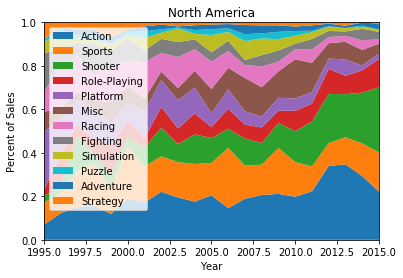

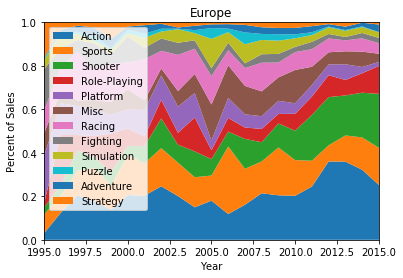

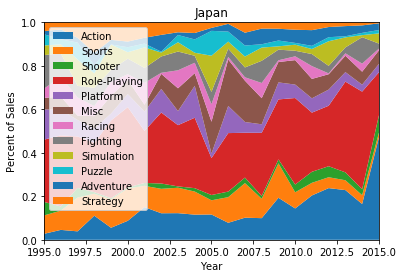

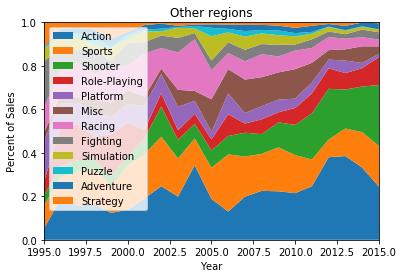

In [25]:
GenreYearSales=SalesData.groupby(["Genre","Year"]).sum()

NA_Ac=GenreYearSales.loc["Action"]["NA_Sales"]/YearlySales["NA_Sales"]
NA_Sp=GenreYearSales.loc["Sports"]["NA_Sales"]/YearlySales["NA_Sales"]
NA_Sh=GenreYearSales.loc["Shooter"]["NA_Sales"]/YearlySales["NA_Sales"]
NA_Rp=GenreYearSales.loc["Role-Playing"]["NA_Sales"]/YearlySales["NA_Sales"]
NA_Pl=GenreYearSales.loc["Platform"]["NA_Sales"]/YearlySales["NA_Sales"]
NA_Mi=GenreYearSales.loc["Misc"]["NA_Sales"]/YearlySales["NA_Sales"]
NA_Ra=GenreYearSales.loc["Racing"]["NA_Sales"]/YearlySales["NA_Sales"]
NA_Fi=GenreYearSales.loc["Fighting"]["NA_Sales"]/YearlySales["NA_Sales"]
NA_Si=GenreYearSales.loc["Simulation"]["NA_Sales"]/YearlySales["NA_Sales"]
NA_Pu=GenreYearSales.loc["Puzzle"]["NA_Sales"]/YearlySales["NA_Sales"]
NA_Ad=GenreYearSales.loc["Adventure"]["NA_Sales"]/YearlySales["NA_Sales"]
NA_St=GenreYearSales.loc["Strategy"]["NA_Sales"]/YearlySales["NA_Sales"]

EU_Ac=GenreYearSales.loc["Action"]["EU_Sales"]/YearlySales["EU_Sales"]
EU_Sp=GenreYearSales.loc["Sports"]["EU_Sales"]/YearlySales["EU_Sales"]
EU_Sh=GenreYearSales.loc["Shooter"]["EU_Sales"]/YearlySales["EU_Sales"]
EU_Rp=GenreYearSales.loc["Role-Playing"]["EU_Sales"]/YearlySales["EU_Sales"]
EU_Pl=GenreYearSales.loc["Platform"]["EU_Sales"]/YearlySales["EU_Sales"]
EU_Mi=GenreYearSales.loc["Misc"]["EU_Sales"]/YearlySales["EU_Sales"]
EU_Ra=GenreYearSales.loc["Racing"]["EU_Sales"]/YearlySales["EU_Sales"]
EU_Fi=GenreYearSales.loc["Fighting"]["EU_Sales"]/YearlySales["EU_Sales"]
EU_Si=GenreYearSales.loc["Simulation"]["EU_Sales"]/YearlySales["EU_Sales"]
EU_Pu=GenreYearSales.loc["Puzzle"]["EU_Sales"]/YearlySales["EU_Sales"]
EU_Ad=GenreYearSales.loc["Adventure"]["EU_Sales"]/YearlySales["EU_Sales"]
EU_St=GenreYearSales.loc["Strategy"]["EU_Sales"]/YearlySales["EU_Sales"]

JP_Ac=GenreYearSales.loc["Action"]["JP_Sales"]/YearlySales["JP_Sales"]
JP_Sp=GenreYearSales.loc["Sports"]["JP_Sales"]/YearlySales["JP_Sales"]
JP_Sh=GenreYearSales.loc["Shooter"]["JP_Sales"]/YearlySales["JP_Sales"]
JP_Rp=GenreYearSales.loc["Role-Playing"]["JP_Sales"]/YearlySales["JP_Sales"]
JP_Pl=GenreYearSales.loc["Platform"]["JP_Sales"]/YearlySales["JP_Sales"]
JP_Mi=GenreYearSales.loc["Misc"]["JP_Sales"]/YearlySales["JP_Sales"]
JP_Ra=GenreYearSales.loc["Racing"]["JP_Sales"]/YearlySales["JP_Sales"]
JP_Fi=GenreYearSales.loc["Fighting"]["JP_Sales"]/YearlySales["JP_Sales"]
JP_Si=GenreYearSales.loc["Simulation"]["JP_Sales"]/YearlySales["JP_Sales"]
JP_Pu=GenreYearSales.loc["Puzzle"]["JP_Sales"]/YearlySales["JP_Sales"]
JP_Ad=GenreYearSales.loc["Adventure"]["JP_Sales"]/YearlySales["JP_Sales"]
JP_St=GenreYearSales.loc["Strategy"]["JP_Sales"]/YearlySales["JP_Sales"]

OT_Ac=GenreYearSales.loc["Action"]["Other_Sales"]/YearlySales["Other_Sales"]
OT_Sp=GenreYearSales.loc["Sports"]["Other_Sales"]/YearlySales["Other_Sales"]
OT_Sh=GenreYearSales.loc["Shooter"]["Other_Sales"]/YearlySales["Other_Sales"]
OT_Rp=GenreYearSales.loc["Role-Playing"]["Other_Sales"]/YearlySales["Other_Sales"]
OT_Pl=GenreYearSales.loc["Platform"]["Other_Sales"]/YearlySales["Other_Sales"]
OT_Mi=GenreYearSales.loc["Misc"]["Other_Sales"]/YearlySales["Other_Sales"]
OT_Ra=GenreYearSales.loc["Racing"]["Other_Sales"]/YearlySales["Other_Sales"]
OT_Fi=GenreYearSales.loc["Fighting"]["Other_Sales"]/YearlySales["Other_Sales"]
OT_Si=GenreYearSales.loc["Simulation"]["Other_Sales"]/YearlySales["Other_Sales"]
OT_Pu=GenreYearSales.loc["Puzzle"]["Other_Sales"]/YearlySales["Other_Sales"]
OT_Ad=GenreYearSales.loc["Adventure"]["Other_Sales"]/YearlySales["Other_Sales"]
OT_St=GenreYearSales.loc["Strategy"]["Other_Sales"]/YearlySales["Other_Sales"]

fig = plt.figure()
ax1 = fig.add_subplot(111)
#Plot the data on the axes
labels=["Action","Sports","Shooter","Role-Playing","Platform","Misc","Racing","Fighting","Simulation","Puzzle","Adventure","Strategy"]
ax1.stackplot(YearlySales["Year"],NA_Ac,NA_Sp,NA_Sh,NA_Rp,NA_Pl,NA_Mi,NA_Ra,NA_Fi,NA_Si,NA_Pu,NA_Ad,NA_St,labels=labels)
ax1.legend(loc='upper left')
plt.xlim(1995,2015)
plt.ylim(0,1)
plt.title("North America")
plt.xlabel("Year")
plt.ylabel("Percent of Sales")
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)
#Plot the data on the axes
ax1.stackplot(YearlySales["Year"],EU_Ac,EU_Sp,EU_Sh,EU_Rp,EU_Pl,EU_Mi,EU_Ra,EU_Fi,EU_Si,EU_Pu,EU_Ad,EU_St,labels=labels)
ax1.legend(loc='upper left')
plt.xlim(1995,2015)
plt.ylim(0,1)
plt.title("Europe")
plt.xlabel("Year")
plt.ylabel("Percent of Sales")
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)
#Plot the data on the axes
ax1.stackplot(YearlySales["Year"],JP_Ac,JP_Sp,JP_Sh,JP_Rp,JP_Pl,JP_Mi,JP_Ra,JP_Fi,JP_Si,JP_Pu,JP_Ad,JP_St,labels=labels)
ax1.legend(loc='upper left')
plt.xlim(1995,2015)
plt.ylim(0,1)
plt.title("Japan")
plt.xlabel("Year")
plt.ylabel("Percent of Sales")
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)
#Plot the data on the axes
ax1.stackplot(YearlySales["Year"],OT_Ac,OT_Sp,OT_Sh,OT_Rp,OT_Pl,OT_Mi,OT_Ra,OT_Fi,OT_Si,OT_Pu,OT_Ad,OT_St,labels=labels)
ax1.legend(loc='upper left')
plt.xlim(1995,2015)
plt.ylim(0,1)
plt.title("Other regions")
plt.xlabel("Year")
plt.ylabel("Percent of Sales")
plt.show()

It looks like NA, EU, and Other regions have similar trends when it comes to video games, but JP is quite different in which sports and shooter games are much less popular.

However, this still does not answer the question in terms of what is trending. It might be better to see if sales are increasing or decreasing for any of these genres. 

We can use linear regression on the sales data from the last 15 years of sales data. If a linear fit to the sales data has a positive trend, that might mean that these genres are trending. Let's plot that information.

In [27]:
from sklearn import datasets, linear_model

Regions=["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]
Genres=["Action","Sports","Shooter","Role-Playing","Platform","Misc","Racing","Fighting","Simulation","Puzzle","Adventure","Strategy"]
for region in Regions:
    for genre in Genres:
        years=GenreYearSales[region][genre].index
        
        regr = linear_model.LinearRegression()
        regr.fit(np.array(years[-15:]).reshape(-1, 1), np.array(GenreYearSales[region][genre])[-15:])
        
        if regr.coef_[0]>0:
            print(region,genre,regr.coef_)

NA_Sales Shooter [0.06725]
EU_Sales Shooter [0.896]
JP_Sales Action [0.18871429]
JP_Sales Shooter [0.07735714]
Other_Sales Shooter [0.317]


It looks like in the Shooter genre, sales are generally increasing over the last 15 years. Action titles also seem to be on the rise in Japan.


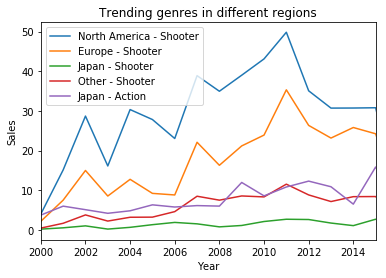

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
#Plot the data on the axes
Years=YearlySales["Year"]
ax1.plot(GenreYearSales.loc["Shooter"]["NA_Sales"])
ax1.plot(GenreYearSales.loc["Shooter"]["EU_Sales"])
ax1.plot(GenreYearSales.loc["Shooter"]["JP_Sales"])
ax1.plot(GenreYearSales.loc["Shooter"]["Other_Sales"])
ax1.plot(GenreYearSales.loc["Action"]["JP_Sales"])
ax1.legend(["North America - Shooter","Europe - Shooter","Japan - Shooter","Other - Shooter", "Japan - Action"],loc='upper left')
plt.xlim(2000,2015)
plt.title("Trending genres in different regions")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

### Question 3: What features about a video game are most indicative of its success?

It is possible to use a random forest model to predict the importance of different features in predicting the sales of different titles. Let's try this approach.

First, we will need to encode some of the categorical features as numbers in order to use a random forest regressor.

Then, we can fit the random forest model for each region, and calculate the feature importances for each region.

In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
SalesData=SalesData.dropna(axis=0, how='any')
Platform = SalesData["Platform"]
Genre = SalesData["Genre"]
Publisher = SalesData["Publisher"]
platform = labelencoder.fit_transform(Platform)
genre = labelencoder.fit_transform(Genre)
publisher = labelencoder.fit_transform(Publisher)

#Add these to the data frame
SalesData["platform"]=platform
SalesData["genre"]=genre
SalesData["publisher"]=genre

#Isolate the columns we wish to train
Data=SalesData
Data=Data.drop(["Publisher","Rank","Platform","Name","Genre"],axis=1)
#Remove nans from dataframe
Data=Data.dropna(axis=0, how='any')
X=Data.iloc[:,[0,6,7,8]]

for region in Regions:
    y=Data[region]


    #Split the training and data set
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    #Import Random Forest Regressor
    from sklearn.ensemble import RandomForestRegressor
    rf = RandomForestRegressor(n_estimators = 100, random_state = 12324)

    #Fit the RF regressor
    rf.fit(X_train, y_train)


    # Use the forest's predict method on the test data
    y_predict = rf.predict(X_test)

    #Calculate root mean squared error
    rmse=(np.mean((y_predict-y_test)**2))**(0.5)
    #Assess feature importances
    print(region)
    print("The RMSE of the RF regressor is ",rmse)
    print("Year, platform, genre,publisher")
    print(list(rf.feature_importances_))
    print("\n")



/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NA_Sales
The RMSE of the RF regressor is  0.837588866196756
Year, platform, genre,publisher
[0.37978483375543404, 0.22221848466592753, 0.21199120250325929, 0.18600547907537926]


EU_Sales
The RMSE of the RF regressor is  0.47129659389189205
Year, platform, genre,publisher
[0.373862302167946, 0.23918430544054206, 0.1863394413528003, 0.20061395103871146]


JP_Sales
The RMSE of the RF regressor is  0.27175353065758373
Year, platform, genre,publisher
[0.4878348858191358, 0.2347353574823584, 0.13691080575544665, 0.14051895094305927]


Other_Sales
The RMSE of the RF regressor is  0.15387800094032206
Year, platform, genre,publisher
[0.366435515764026, 0.2847149240880232, 0.18213912244330607, 0.1667104377046447]




The single biggest predictor of sales is the year in which the game was released, which is not the most helpful information to video game publishers. Beyond this, the platform appears to be important. The genre and game publisher/game studio appear to share an equal importance in determining sales.

